# Part II - Ford GoBike Data System
## by Gozie Achebe

## Investigation Overview

> I investigated on this Ford GoBike Dataset. I did some wrangling that helped me to change types of some varables and also create more columns I would need. I went on to take 15 questions on which I used the plots to find the answers.
> My findings from this dataset are: The males are more in number. Up to 74.6% percent of the whole members are male. There are few that did not specify gender, 2.1% percent of them. The male patronises the bicycle share system. Majority of the riders are in their 30's. There is evidence that males keep bikes a bit longer that the females. The peak time for males is almost the same for females. There is no significant difference observed in the peak hour for taking bikes. I could not find significant difference in peak days. They have similar peak days for picking bikes


## Dataset Overview

> Ford GoBike Data is a datset with 16 columns and 183412 rows. The dataset contains information about the Bike Sharing System in San Francisco Area. The data pulled covered entries in February 2019. There bike station names, latitude and longitude of the stations, duration of the bike taken from the station, biker year of birth etc

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
ford = pd.read_csv('fordbike_copy.csv');
ford.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,displacement,start_hour,start_day,end_hour,end_day,end_year,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,0.34,17,28,8,1,2019,35
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,1.68,12,28,5,1,2019,47
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,0.16,17,28,4,1,2019,30


## Users Gender Percentage

>The dataset contains information about users(both male and female). All these users are riding bicyccles. It is important to know the percentage of the male and that of the female. It is also noted that there are others that did not declare their gender. I found out that the male are more in number. Up to 74.6% percent of the whole members are male. There are few that did not specify gender, 2.1% percent of them. The male patronises the bicycle share system

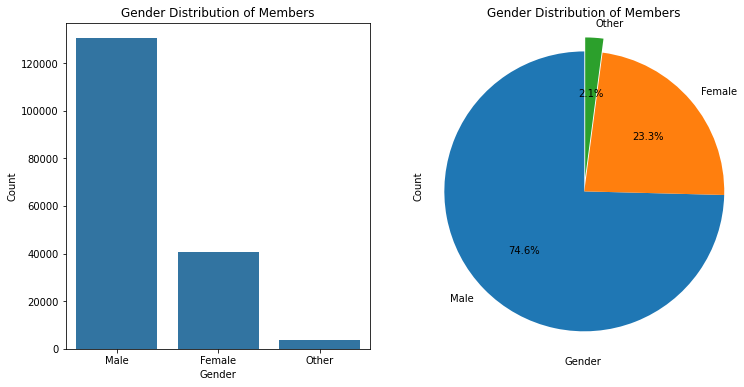

In [4]:
#bar chart
plt.rcParams["figure.figsize"] = (12,6)
fig8, (ax8,ax9) = plt.subplots(1,2,)
order = ford.member_gender.value_counts()
color = sb.color_palette()[0]
sb.countplot(x = ford.member_gender, ax=ax8, order=order.index, color=color)
ax8.set_xlabel("Gender")
ax8.set_ylabel("Count")
ax8.set_title("Gender Distribution of Members")

# pie chart
gender = ford.member_gender.value_counts()
explode = [0,0,0.1]
plt.pie(x = gender,autopct='%1.1f%%',
        shadow=False, startangle=90,explode=explode,labels=order.index);
ax9.axis('equal')
plt.xlabel("Gender")
plt.ylabel("Count")
# plt.legend()
plt.title("Gender Distribution of Members");

## Age of the Users

> The dataset also contains the age distribution of the users. It is of great use to know the age of the majority of these riders. From the plot, I got that to be those in their 30's

Text(0.5, 1.0, 'Histogram of the Distribution of Ages of the Riders')

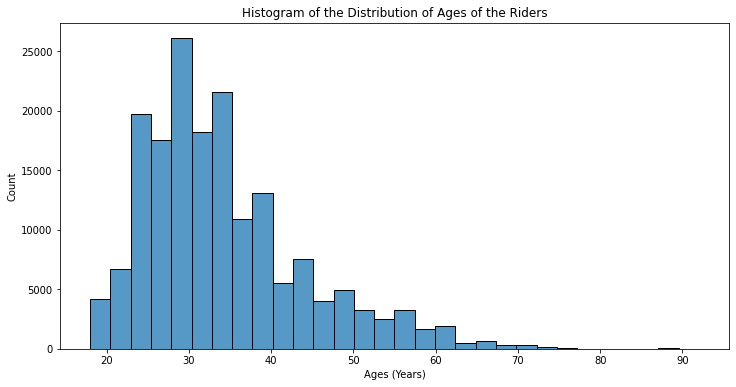

In [5]:
# histogram plot for age
fig10, (ax10) = plt.subplots(1,1)
sb.histplot(data=ford,x='age', bins=30);
ax10.set_xlabel("Ages (Years)")
ax10.set_ylabel("Count")
ax10.set_title("Histogram of the Distribution of Ages of the Riders")

## Is peak time for males different from the females?



>Gender sometimes plays it role in the life of people. We need to find out if there is difference in the peak hours female and male get bicycle from the stations. If there is, we need to look more to know why. Looking at what we have, the peak time for males is almost the same for females. There is no significant difference observed in the peak hour for taking bikesThe peak time for males is almost the same for females. There is no significant difference observed in the peak hour for taking bikes

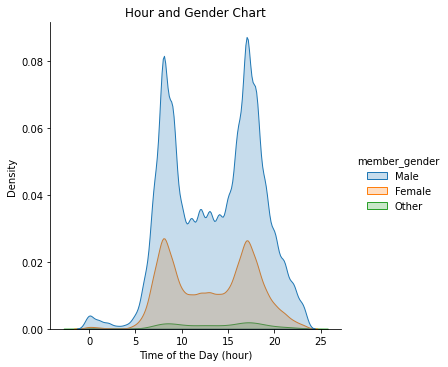

In [6]:
#gender and start hour

sb.displot(ford, x="start_hour", hue="member_gender", kind="kde", fill=True,hue_order=["Male","Female","Other"]);
plt.xlabel("Time of the Day (hour)")
plt.ylabel("Density")
plt.title("Hour and Gender Chart");

## Is the peak days for males different from females for taking bikes?

> Still with what we have above, let us look the days females prefer to make use of bikes. Could this be a different set of days for males? Well, from the information available to us, I could not find significant difference in peak days. Following the shape of the plot, they have similar peak days for picking bikes

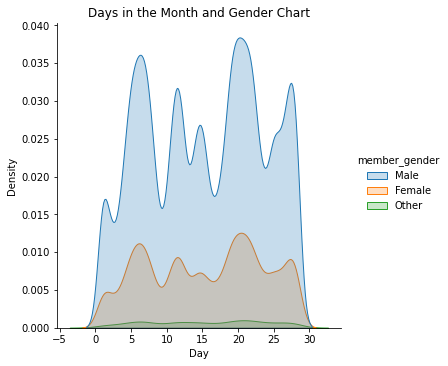

In [7]:
# Days and Gender
sb.displot(ford, x="start_day", hue="member_gender", kind="kde", fill=True,hue_order=["Male","Female","Other"])
plt.xlabel("Day")
plt.ylabel("Density")
plt.title("Days in the Month and Gender Chart");